# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
#importing all the necessary libraries that would be used in this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import requests
import os
import re
from PIL import Image
from io import BytesIO
from bs4 import BeautifulSoup 
import json
from tweepy import OAuthHandler

%matplotlib inline

In [2]:
#Reading and storing the archived data in a dataframe
archived_df = pd.read_csv('twitter-archive-enhanced.csv')
archived_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Using the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#Programmatically downloading files from the internet - image_predictions file

folder_name = 'image_prediction'  #create folder to hold the tsv files

if not os.path.exists(folder_name): #checking if the folder exists already in directory, if not create one
    os.makedirs(folder_name)

#getting image information from the given url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)  
with open (os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

os.listdir(folder_name)

['image-predictions.tsv']

In [4]:
#Reading the image prediction file into a dataframe
img_prediction_df = pd.read_csv('image_prediction/image-predictions.tsv', sep = '\t')
img_prediction_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archived_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

In [5]:
#Read txt file into json format and parse into a dataframe
info_tweets = []
with open('tweet-json.txt') as json_file:
     for json_record in json_file:
        tweet = json.loads(json_record)
        tweet_id = tweet['id']
        retweets = tweet['retweet_count']
        favourites = tweet['favorite_count']
        followers = tweet['user']['followers_count']
        friends = tweet['user']['friends_count']
        info_tweets.append({'tweet_id': tweet_id, 'retweets' : retweets,
                             'favorites': favourites
                             ,
                            'friends' : friends
                             , 
                             'followers' : followers
                            })

infotweets_df = pd.DataFrame(info_tweets, columns = ['tweet_id', 'retweets', 'favorites', 'friends', 'followers'])
infotweets_df.head(5)

,tweet_id,retweets,favorites,friends,followers
0,892420643555336193,8853,39467,104,3200889
1,892177421306343426,6514,33819,104,3200889
2,891815181378084864,4328,25461,104,3200889
3,891689557279858688,8964,42908,104,3200889
4,891327558926688256,9774,41048,104,3200889


## Assessing Data
In this section, I will be assessing the three datasets that have been gathered so far to check for quality and tidyness issues.



#### Assessing the Archived Data 

In [6]:
archived_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
archived_df.shape

(2356, 17)

In [8]:
#check for non nulls per column 
archived_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
#Check for number of nulls per column 
archived_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [10]:
#check for duplicate records 
archived_df.duplicated().sum()

0

In [11]:
#Check for statistics of numerical data in the table
archived_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
#check to see records with no rating (assuming ratings with 0 are not records with ratings)
archived_df[archived_df.rating_numerator == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [13]:
#Check the columns in the table 
archived_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [14]:
#check the datatypes of the columns to ensure they are in the right datatypes
archived_df.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [15]:
#checking for the unique names of the dogs in the table and scanning for anomalies
archived_df.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

#### Assessing the Image Prediction Data 

In [16]:
img_prediction_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [17]:
img_prediction_df.shape

(2075, 12)

In [18]:
#check for non nulls per column 
img_prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
#Check for number of nulls per column 
img_prediction_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [20]:
#check for duplicate records 
img_prediction_df.duplicated().sum()

0

In [21]:
#Check for statistics of numerical data in the table
img_prediction_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [22]:
#check the datatypes of the columns to ensure they are in the right datatypes
img_prediction_df.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

#### Assessing the tweet data 

In [23]:
infotweets_df.head()

,tweet_id,retweets,favorites,friends,followers
0,892420643555336193,8853,39467,104,3200889
1,892177421306343426,6514,33819,104,3200889
2,891815181378084864,4328,25461,104,3200889
3,891689557279858688,8964,42908,104,3200889
4,891327558926688256,9774,41048,104,3200889


In [24]:
infotweets_df.shape

(2354, 5)

In [25]:
#check for non nulls per column 
infotweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
tweet_id     2354 non-null int64
retweets     2354 non-null int64
favorites    2354 non-null int64
friends      2354 non-null int64
followers    2354 non-null int64
dtypes: int64(5)
memory usage: 92.0 KB


In [26]:
#Check for number of nulls per column 
img_prediction_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [27]:
#check for duplicate records 
infotweets_df.duplicated().sum()

0

In [28]:
#Check for statistics of numerical data in the table
infotweets_df.describe()

,tweet_id,retweets,favorites,friends,followers
count,2.354000e+03,2354.000000,2354.000000,2354.0,2.354000e+03
mean,7.426978e+17,3164.797366,8080.968564,104.0,3.200942e+06
std,6.852812e+16,5284.770364,11814.771334,0.0,4.457302e+01
min,6.660209e+17,0.000000,0.000000,104.0,3.200799e+06
25%,6.783975e+17,624.500000,1415.000000,104.0,3.200898e+06
50%,7.194596e+17,1473.500000,3603.500000,104.0,3.200945e+06
75%,7.993058e+17,3652.000000,10122.250000,104.0,3.200953e+06
max,8.924206e+17,79515.000000,132810.000000,104.0,3.201018e+06


In [29]:
#check the datatypes of the columns to ensure they are in the right datatypes
infotweets_df.dtypes

tweet_id     int64
retweets     int64
favorites    int64
friends      int64
followers    int64
dtype: object

### Quality issues
1. The archived_df table has columns with missing values 

2. Errors in dog names. Some dogs had names like - 'just', 'life', 'mad', 'my', 'not', 'officially', 'old', 'one', 'quite', 'space', 'such', 'the', 'this', 'unacceptable', 'very', 'infuriating 

3. Timestamp in archived_df table is of datatype object instead of datetime 

4. Outrageous and inconsistent values in rating numerator and denominator 

5. Some ratings have a zero numerator and no name 

6. The archived_df table has some values in the retweet columns, which is not to be considered in this project as a user can retweet on their tweet. This means records(rows) with values in these columns will be removed. 

7. Columns which have missing values in doggo, floofer, pupper, puppo are written as None instead of NaN hence their representation seems like they have values when they don't 

8. Comparing both img_prediction_df and infotweets_df to archived_df, we can see that they both have incomplete tweet ids unlike archive_df 

9. Retweeted_status_timestamp in archived_df table is of datatype object instead of datetime 


### Tidiness issues
1. The columns explaining the dog stages in archive_df could have easily be merged into one to give comprehensive information on the current dogstage of that record 

2. Img_prediction_df column names - p1,p2,p3 could be given better explanatory names 

3. All redundant columns are removed (e.g the single dog stage columns once I have the merged column, and the retweet columns after they are cleaned).

## Cleaning Data


In [30]:
# Make copies of original pieces of data
archived_clean = archived_df.copy()
img_prediction_clean = img_prediction_df.copy()
infotweets_clean = infotweets_df.copy()

#### Issue #1: Ratings with Zero numerator and no name

#### Define: check for the records with this, and remove them from the data 

#### Code

In [31]:
indexNames = archived_clean[(archived_clean['rating_numerator'] == 0) & (archived_clean['name'] == 'None')].index
archived_clean.drop(indexNames, inplace= True)


#### Test

In [32]:
archived_clean['rating_numerator'].min()

1

#### Issue #2: timestamp in archived_df table is of datatype object instead of datetime

#### Define: convert the datatype to a datetime using the datetime module

#### Code

In [33]:

archived_clean['timestamp'] = pd.to_datetime(archived_clean['timestamp'])



#### Test

In [34]:
archived_clean.dtypes

tweet_id                               int64
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp            object
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

#### Issue #3:  retweeted_status_timestamp in archived_df table is of datatype object instead of datetime

#### Define: convert the datatype to a datetime using the datetime module

#### Code

In [35]:
archived_clean['retweeted_status_timestamp'] = pd.to_datetime(archived_clean['retweeted_status_timestamp'])

#### Test

In [36]:
archived_clean.dtypes

tweet_id                               int64
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp    datetime64[ns]
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

#### Issue #4:  Missing values in name, doggo, floofer, pupper, puppo are written as None instead of NaN 

#### Define: convert all None values to NaN

#### Code

In [37]:
archived_clean.replace('None', np.nan, inplace=True)

#### Test

In [38]:
archived_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


#### Issue #5:  p1, p2, p3 columns in img_prediction_df could have better explanatory names 

#### Define: convert the names to standardised understable names

#### Code

In [40]:

img_prediction_clean.rename(columns = {'p1':'1st_Prediction',
                                   'p1_conf' : '1st_Prediction_Confidence',
                                   'p1_dog': '1st_Prediction_Dog',
                                   'p2': '2nd_Prediction',
                                   'p2_conf' :'2nd_Prediction_Confidence',
                                   'p2_dog': '2nd_Prediction_Dog',
                                   'p3': '3rd_Prediction',
                                   'p3_conf' :'3rd_Prediction_Confidence',
                                   'p3_dog': '3rd_Prediction_Dog'}, inplace=True)


#### Test

In [41]:
img_prediction_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', '1st_Prediction',
       '1st_Prediction_Confidence', '1st_Prediction_Dog', '2nd_Prediction',
       '2nd_Prediction_Confidence', '2nd_Prediction_Dog', '3rd_Prediction',
       '3rd_Prediction_Confidence', '3rd_Prediction_Dog'],
      dtype='object')

#### Issue #6:  merge the dog stage columns to one 

#### Define: apply pandas method to create a column that is a concatenation of the previous dog stages and standardise the names

#### Code

In [42]:
#merging the dog stage columns into one, and delete the redundant columns
archived_clean["dog_stages"] = archived_clean["doggo"].fillna('') + archived_clean["floofer"].fillna('') + archived_clean['pupper'].fillna('') + archived_clean['puppo'].fillna('')


In [43]:
archived_clean.dog_stages.value_counts()

                1974
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stages, dtype: int64

In [44]:
#correcting values like emptystring = None, doggopupper= doggo-pupper, doggofloofer = doggo-floofer, doggopuppo = doggo-puppo

previous = ['', 'doggofloofer', 'doggopupper', 'doggopuppo']
new = ['None', 'doggo-floofer', 'doggo-pupper', 'doggo-puppo']

for i in range(len(previous)):
    archived_clean['dog_stages'].replace(previous[i], new[i], inplace=True)
    
archived_clean['dog_stages'].unique()

array(['None', 'doggo', 'puppo', 'pupper', 'floofer', 'doggo-puppo',
       'doggo-floofer', 'doggo-pupper'], dtype=object)

In [47]:
#Removing the redundant stage columns
archived_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [50]:
#convert the "None" values in dog-stage column to NaN
archived_clean.replace('None', np.nan, inplace=True)

#### Test

In [51]:
archived_clean.dog_stages.value_counts()

pupper           245
doggo             83
puppo             29
doggo-pupper      12
floofer            9
doggo-floofer      1
doggo-puppo        1
Name: dog_stages, dtype: int64

In [52]:
archived_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stages
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


#### Issue #7:  Removing rows with retweets from the archived data 

#### Define: check for the records with values in the columns retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

#### Code

In [53]:
#take only the null values from each column in the dataset
archived_clean = archived_clean[archived_clean['retweeted_status_id'].isnull()]
archived_clean = archived_clean[archived_clean['retweeted_status_user_id'].isnull()]
archived_clean = archived_clean[archived_clean['retweeted_status_timestamp'].isnull()]

#### Test

In [54]:
archived_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2173 non-null int64
in_reply_to_status_id         77 non-null float64
in_reply_to_user_id           77 non-null float64
timestamp                     2173 non-null datetime64[ns]
source                        2173 non-null object
text                          2173 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2115 non-null object
rating_numerator              2173 non-null int64
rating_denominator            2173 non-null int64
name                          1495 non-null object
dog_stages                    344 non-null object
dtypes: datetime64[ns](2), float64(4), int64(3), object(5)
memory usage: 254.6+ KB


Since we see that the non null values of "retweeted_status_id", "retweeted_status_user_id", and "retweeted_status_timestamp" is all 0, this satisfies the check

In [63]:
#Dropping the columns as they are of no use to us again
archived_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

In [64]:
archived_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


#### Issue #8:  Ratings with denominator value as 0 

#### Define: check for the records with this, and remove them from the data 

#### Code

In [65]:
indexNames = archived_clean[archived_clean['rating_denominator'] == 0].index
archived_clean.drop(indexNames, inplace= True)

#### Test

In [66]:
archived_clean.rating_denominator.min()

2

#### Issue #9:  Merging the three tables to get the complete data in one master dataset

#### Define: merge the three tables to each other using the common column (tweet id)

#### Code

In [67]:
#create a master dataframe that holds all the informations of the three datasets on the tweet id 
#Since we want only original ratings that have retweets data and images, we use inner join 

master_df = pd.merge(archived_clean, infotweets_clean, how = 'inner', on = 'tweet_id')
master_df = pd.merge(master_df, img_prediction_clean, how = 'inner', on = 'tweet_id')
master_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,1st_Prediction,1st_Prediction_Confidence,1st_Prediction_Dog,2nd_Prediction,2nd_Prediction_Confidence,2nd_Prediction_Dog,3rd_Prediction,3rd_Prediction_Confidence,3rd_Prediction_Dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [68]:
master_df['source'] = master_df['source'].apply(lambda x:re.findall(r'>(.*)<', x)[0])


#### Test

In [69]:
master_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,1st_Prediction,1st_Prediction_Confidence,1st_Prediction_Dog,2nd_Prediction,2nd_Prediction_Confidence,2nd_Prediction_Dog,3rd_Prediction,3rd_Prediction_Confidence,3rd_Prediction_Dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,...,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,...,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,...,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,...,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,...,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


#### Assessing the master dataset 

In [70]:
master_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,1st_Prediction,1st_Prediction_Confidence,1st_Prediction_Dog,2nd_Prediction,2nd_Prediction_Confidence,2nd_Prediction_Dog,3rd_Prediction,3rd_Prediction_Confidence,3rd_Prediction_Dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [71]:
master_df.shape

(1992, 26)

In [72]:
#check for non nulls per column 
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 1991
Data columns (total 26 columns):
tweet_id                     1992 non-null int64
in_reply_to_status_id        22 non-null float64
in_reply_to_user_id          22 non-null float64
timestamp                    1992 non-null datetime64[ns]
source                       1992 non-null object
text                         1992 non-null object
expanded_urls                1992 non-null object
rating_numerator             1992 non-null int64
rating_denominator           1992 non-null int64
name                         1448 non-null object
dog_stages                   306 non-null object
retweets                     1992 non-null int64
favorites                    1992 non-null int64
friends                      1992 non-null int64
followers                    1992 non-null int64
jpg_url                      1992 non-null object
img_num                      1992 non-null int64
1st_Prediction               1992 non-null obj

In [73]:
#Check for number of nulls per column 
master_df.isnull().sum()
#From this, we can see that the conditions that every record must have a tweet id, image, retweet is satisfied 

tweet_id                        0
in_reply_to_status_id        1970
in_reply_to_user_id          1970
timestamp                       0
source                          0
text                            0
expanded_urls                   0
rating_numerator                0
rating_denominator              0
name                          544
dog_stages                   1686
retweets                        0
favorites                       0
friends                         0
followers                       0
jpg_url                         0
img_num                         0
1st_Prediction                  0
1st_Prediction_Confidence       0
1st_Prediction_Dog              0
2nd_Prediction                  0
2nd_Prediction_Confidence       0
2nd_Prediction_Dog              0
3rd_Prediction                  0
3rd_Prediction_Confidence       0
3rd_Prediction_Dog              0
dtype: int64

In [74]:
#check for duplicate data 
master_df.duplicated().sum()

0

In [75]:
#check for duplicate tweet id - we are not meant to have the same tweet id occuring more than once in the dataset 
master_df['tweet_id'].duplicated().sum()

0

In [76]:
master_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,rating_numerator,rating_denominator,retweets,favorites,friends,followers,img_num,1st_Prediction_Confidence,2nd_Prediction_Confidence,3rd_Prediction_Confidence
count,1.992000e+03,2.200000e+01,2.200000e+01,1992.000000,1992.000000,1992.000000,1992.000000,1992.0,1.992000e+03,1992.000000,1992.000000,1.992000e+03,1.992000e+03
mean,7.357954e+17,6.955805e+17,4.196984e+09,12.293173,10.532631,2767.634036,8890.730422,104.0,3.200946e+06,1.202309,0.593815,1.344477e-01,6.027290e-02
std,6.747487e+16,4.325533e+16,0.000000e+00,41.516729,7.324367,4676.703867,12213.597413,0.0,4.478720e+01,0.559593,0.271948,1.006837e-01,5.090215e-02
min,6.660209e+17,6.671522e+17,4.196984e+09,1.000000,2.000000,16.000000,81.000000,104.0,3.200799e+06,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.758399e+17,6.724855e+17,4.196984e+09,10.000000,10.000000,626.250000,1978.500000,104.0,3.200901e+06,1.000000,0.362775,5.401683e-02,1.619708e-02
50%,7.084132e+17,6.756022e+17,4.196984e+09,11.000000,10.000000,1359.500000,4136.000000,104.0,3.200947e+06,1.000000,0.587635,1.174550e-01,4.950530e-02
75%,7.877408e+17,7.002919e+17,4.196984e+09,12.000000,10.000000,3220.000000,11304.000000,104.0,3.201002e+06,1.000000,0.845599,1.949772e-01,9.162278e-02
max,8.924206e+17,8.558181e+17,4.196984e+09,1776.000000,170.000000,79515.000000,132810.000000,104.0,3.201018e+06,4.000000,1.000000,4.880140e-01,2.734190e-01


In [77]:
master_df.dtypes

tweet_id                              int64
in_reply_to_status_id               float64
in_reply_to_user_id                 float64
timestamp                    datetime64[ns]
source                               object
text                                 object
expanded_urls                        object
rating_numerator                      int64
rating_denominator                    int64
name                                 object
dog_stages                           object
retweets                              int64
favorites                             int64
friends                               int64
followers                             int64
jpg_url                              object
img_num                               int64
1st_Prediction                       object
1st_Prediction_Confidence           float64
1st_Prediction_Dog                     bool
2nd_Prediction                       object
2nd_Prediction_Confidence           float64
2nd_Prediction_Dog              

## Storing Data

#### Observation

We now have a clean master dataset for analysis, we can go ahead to store out master dataset.

In [78]:
#Store master dataset to a flat file
master_df.to_csv('twitter_archive_master.csv', index= False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [79]:
master_df['retweets']

0        8853
1        6514
2        4328
3        8964
4        9774
5        3261
6        2158
7       16716
8        4429
9        7711
10       7624
11       5156
12       8538
13       4735
14       2321
15       5637
16       4709
17       4559
18       3732
19       3653
20       5609
21      12082
22      18781
23      10737
24       6167
25       8084
26       3443
27       4610
28       3316
29       6523
        ...  
1962      339
1963       44
1964       92
1965      100
1966      595
1967       77
1968      146
1969       96
1970      368
1971       71
1972       82
1973       37
1974     6871
1975       16
1976       73
1977       79
1978       47
1979      174
1980       67
1981      232
1982       61
1983      146
1984      261
1985      879
1986       60
1987       41
1988      147
1989       47
1990       48
1991      532
Name: retweets, Length: 1992, dtype: int64

### Insights:
1. Which dog stage was most prominent in the data 

2. Trend of followers of Weratedogs twitter account across the period the data was collected 

3. Dog names that are most prominent in weratedogs twitter account 

### Visualization

A heat map showing the relationships between retweets, favourites, followers 

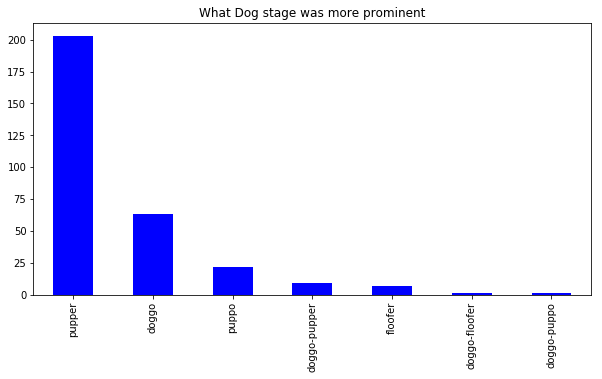

In [80]:
# Which dog stage was most prominent in the data 

chart_1 = master_df[master_df['dog_stages'] != 'None']['dog_stages'].value_counts().plot(kind='bar', color = 'b', figsize=(10,5));
plt.title('What Dog stage was more prominent');
chart_2 = chart_1.get_figure()
chart_2.savefig('dogstageplot.png')


It can be seen from the plot that pupper was the most common stage among dogs displayed on WeRateDogs twitter page.

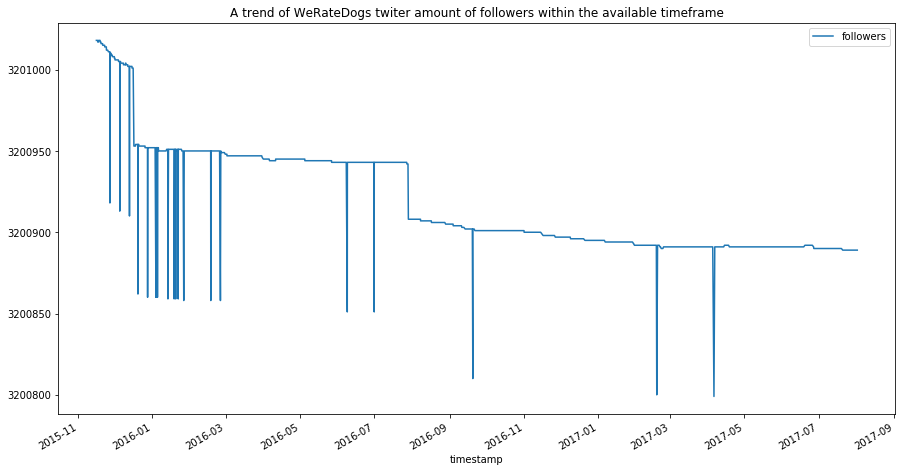

In [81]:
#Trend of followers of Weratedogs twitter account across the period the data was collected

fig_1 = master_df[['timestamp','followers']].plot('timestamp', figsize=(15,8))
plt.title('A trend of WeRateDogs twiter amount of followers within the available timeframe');
fig_2 = fig_1.get_figure()
fig_2.savefig('timetrendplot.png')


There is a decline in the total amount of followers across the years. This maybe one variable they might want to look at as an increase in followers will mean a wider audience reach for WeRateDogs.

In [82]:
master_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stages', 'retweets', 'favorites',
       'friends', 'followers', 'jpg_url', 'img_num', '1st_Prediction',
       '1st_Prediction_Confidence', '1st_Prediction_Dog', '2nd_Prediction',
       '2nd_Prediction_Confidence', '2nd_Prediction_Dog', '3rd_Prediction',
       '3rd_Prediction_Confidence', '3rd_Prediction_Dog'],
      dtype='object')

In [83]:
# Dog names that are most prominent in weratedogs twitter account

true_1st = master_df[master_df['1st_Prediction_Dog'] == True]
true_2nd = master_df[master_df['2nd_Prediction_Dog'] == True]
true_3rd = master_df[master_df['3rd_Prediction_Dog'] == True]

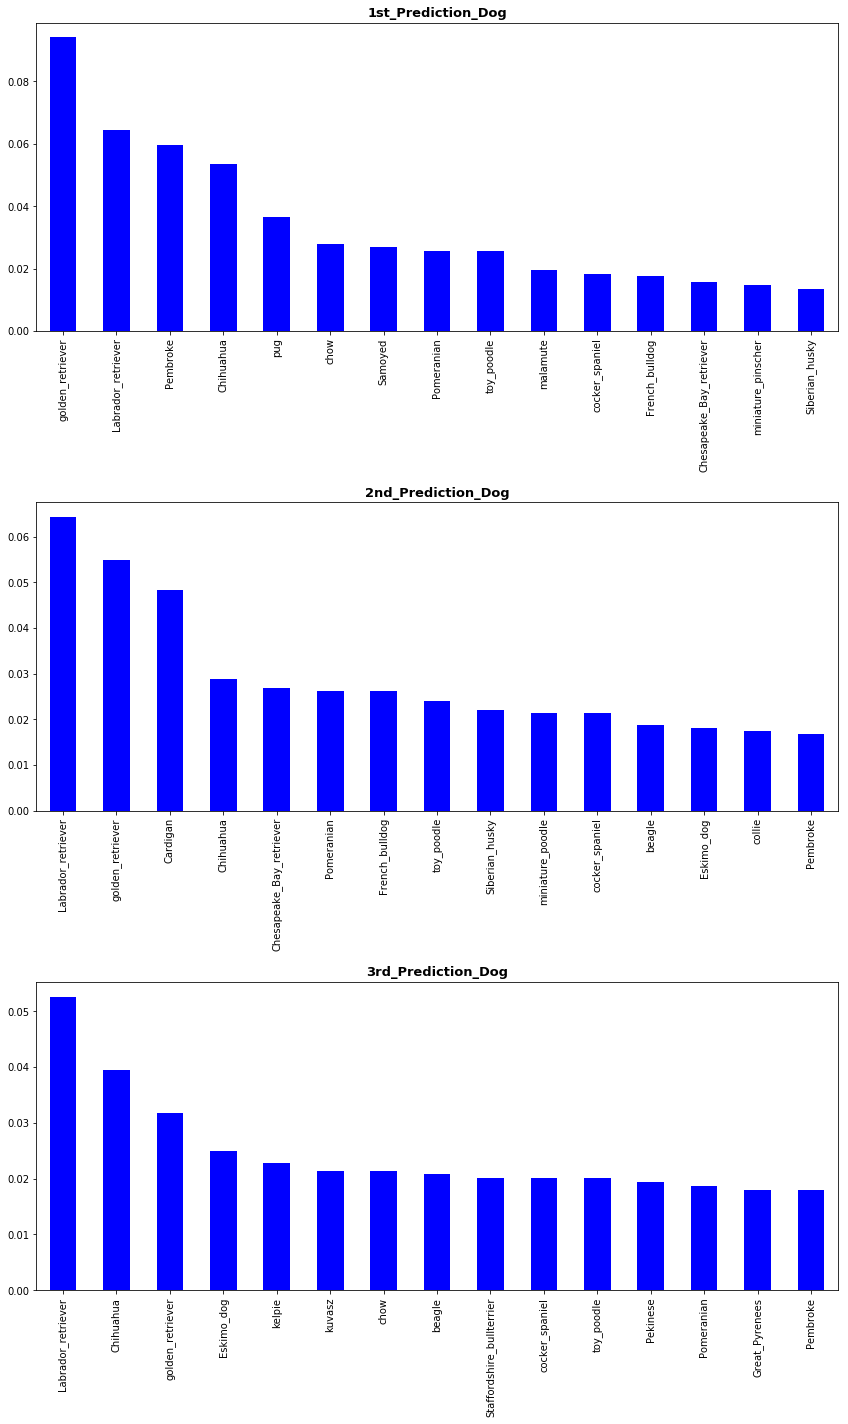

In [84]:
precision = ['1st_Prediction_Dog','2nd_Prediction_Dog', '3rd_Prediction_Dog']
dog_breed = ['1st_Prediction','2nd_Prediction','3rd_Prediction']
figure = plt.figure(figsize = [12, 20])
t = 1

for val in precision:
    plt.subplot(int(str(31)+str(t)))
    df = master_df[master_df[val] == True]
    df[dog_breed[t-1]].value_counts(normalize= True)[:15].plot.bar(color = 'b');
    plt.title(val, fontweight="bold", fontsize = 13.0)
    t+=1
    
figure.tight_layout(pad= 1.5);
figure.savefig('breedplot.png')

As seen in the plots above, the golden_retriever and labrador_retriever are very good looking dog breed as they are prominent in the amount of appearnces in the top 3 dogs in each chart.

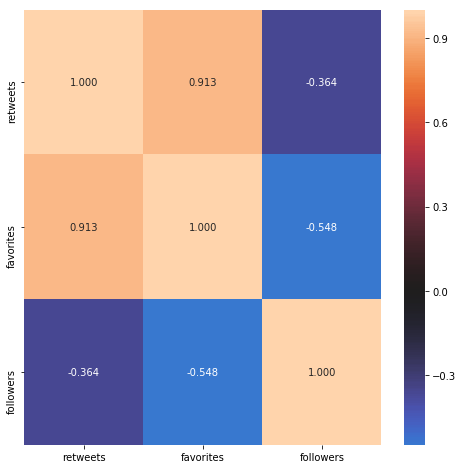

In [85]:
#A heat map showing the relationships between retweets, favourites, followers

variables = ['retweets', 'favorites', 'followers']
plt.figure(figsize=[8,8])
chart_3 = sb.heatmap(master_df[variables].corr(), annot = True, fmt = '.3f',
            center = 0);
fig_3 = chart_3.get_figure()
fig_3.savefig('heatmapplot.png')

From the above heatmap, we can deduce that;

favorites and retweets have a strong positive correation, therefore the more likes we get, the more retweets of that post we are likely to get. 

followers is negatively correlated to both favourites and retweets, although followers has a weak negative correlation with retweets compared to favourites